In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp,shapiro,levene,ttest_ind,mannwhitneyu,pearsonr,spearmanr,kendalltau,\
                        f_oneway, kruskal

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format", lambda x : "%.3f" %x)
pd.set_option("display.width",200)

In [4]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/ab_testing.xlsx"

In [5]:
control = pd.read_excel(path, sheet_name = "Control Group")
test = pd.read_excel(path, sheet_name = "Test Group")

In [6]:
control = control.iloc[:,:4]
test = test.iloc[:,:4]

print("Control Shape : {}".format(control.shape))
print("Test Shape : {}".format(test.shape))

Control Shape : (40, 4)
Test Shape : (40, 4)


In [7]:
def col_unique(dataframe):
    
    for col in dataframe.columns:
        print(f"{col.upper()} Nunique Values : {dataframe[col].nunique()}")

In [8]:
# Control
col_unique(control)

IMPRESSION Nunique Values : 40
CLICK Nunique Values : 40
PURCHASE Nunique Values : 40
EARNING Nunique Values : 40


In [9]:
# Test 
col_unique(test)

IMPRESSION Nunique Values : 40
CLICK Nunique Values : 40
PURCHASE Nunique Values : 40
EARNING Nunique Values : 40


In [10]:
purchase_test = test.groupby("Purchase").agg({"Earning" : "mean"}).reset_index()
purchase_control = control.groupby("Purchase").agg({"Earning" : "mean"}).reset_index()

In [11]:
purchase_control.head()

,Purchase,Earning
0,267.029,1791.799
1,315.085,1742.807
2,329.377,2143.590
3,345.046,1781.358
4,386.098,2174.094


In [12]:
purchase_test.head()

,Purchase,Earning
0,311.630,2551.243
1,346.463,2615.573
2,357.234,2464.663
3,372.126,1947.747
4,382.047,2277.864


In [13]:
def na_check(dataframe):    
    
    if dataframe.isnull().sum().any() == False:
         
        print("No null values")
        
    else: 
        
        print("There is an empty value")

In [14]:
na_check(control)
na_check(test)

No null values
No null values


In [15]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.000,120512.412,18807.449,79033.835,112691.971,119291.301,132050.579,158605.920
Click,40.000,3967.550,923.095,1836.630,3376.819,3931.360,4660.498,6019.695
Purchase,40.000,582.106,161.153,311.630,444.627,551.356,699.862,889.910
Earning,40.000,2514.891,282.731,1939.611,2280.537,2544.666,2761.545,3171.490


In [16]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.000,101711.449,20302.158,45475.943,85726.690,99790.701,115212.817,147539.336
Click,40.000,5100.657,1329.985,2189.753,4124.304,5001.221,5923.804,7959.125
Purchase,40.000,550.894,134.108,267.029,470.096,531.206,637.957,801.795
Earning,40.000,1908.568,302.918,1253.990,1685.847,1975.161,2119.803,2497.295


## Mission 1:
* Define the hypothesis of the A/B test.

## Mission 2:
* Perform the hypothesis test. Comment whether the results are statistically significant.

In [17]:
################################################ ####
# AB Testing (Independent Two Sample T Test)
################################################ ####

#1. Establish Hypotheses

#2. Assumption Check
# - 1. Normality Assumption
# - 2. Variance Homogeneity

# 3. Implementation of the Hypothesis
# - HO red if p-value < 0.05.
# - 1. Independent two-sample t-test (parametric test) if assumptions are met
# - 2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

# Note:
# - Direct number 2 if normality is not achieved. If variance homogeneity is not provided, an argument is entered for number 1.
# - It can be useful to perform outlier analysis and correction before normality analysis.

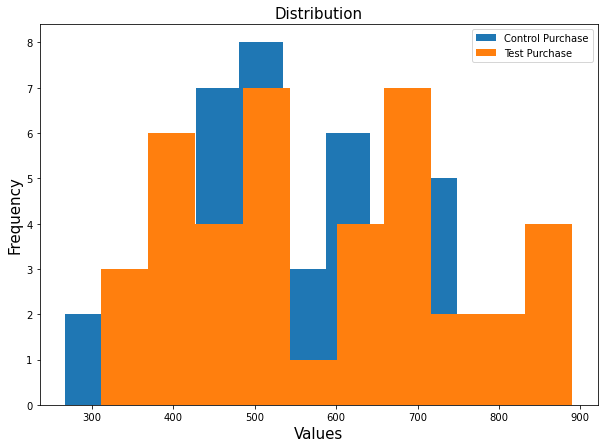

In [18]:
# Are these differences really true or just by chance???
plt.figure(figsize = (10,7))
control["Purchase"].plot(kind = "hist", label = "Control Purchase")
test["Purchase"].plot(kind = "hist", label = "Test Purchase")

plt.title("Distribution" , fontsize = 15)
plt.xlabel("Values" , fontsize = 15)
plt.ylabel("Frequency" , fontsize = 15)
plt.legend()

plt.show()

In [19]:
def ab_test(GroupA, GroupB):
    """
    
    #Normality Test

    # H0: Normal distribution assumption is provided.
    # H1:..not provided.
    
    #homogeneity
    
    # H0: Variances are Homogeneous
    # H1: Variances Are Not Homogeneous
        

    #1. Independent two-sample t-test (parametric test) if assumptions are met
    # 2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

    # If normality is not achieved, we will do all kinds of nonparametric tests.
    # What happens if normality is achieved and variance homogeneity is not achieved?
    # We will enter arguments to the t test function.

    # H0: M1 = M2 (... there is no significant difference between the mean of the two groups.)
    # H1: M1 != M2 (...is)
    
    !!!!!# p-value < ise 0.05'ten HO RED.
    !!!!!# p-value < değilse 0.05 H0 REDDEDILEMEZ.
    
    
    """
    
    
    results = pd.DataFrame()
    
    testA = shapiro(GroupA)[1] < 0.05
    testB = shapiro(GroupB)[1] < 0.05
    
    # HO Reddedilemez o yüzden homojenliği kontrol et !!!
    
    if (testA == False) & (testB == False): 
        
        leveneTest = levene(GroupA, GroupB)[1] < 0.5
        
        if leveneTest == False:
            
            ttest = ttest_ind(GroupA, GroupB, equal_var=True)[1]
            
        else:
            
            ttest = ttest_ind(GroupA, GroupB, equal_var=False)[1]
            
    else:
        
        ttest = mannwhitneyu(GroupA, GroupB)[1]
        
    
    results = pd.DataFrame({"Compare Two Groups" : [ttest < 0.05],
                            "p-value" : [round(ttest,4)],
                            "GroupA_Mean"   : [GroupA.mean()]   , "GroupB_Mean"   : [GroupB.mean()],
                            "GroupA_Median" : [GroupA.median()] , "GroupB_Median" : [GroupB.median()],
                            "GroupA_Count"  : [GroupA.count()]  , "GroupB_Count" : [GroupB.count()]} )
    
    results["Compare Two Groups"] = np.where(results["Compare Two Groups"] == True,"Different Groups",
                                                                                   "Similir Groups")
    
    results["TestType"] = np.where( (testA == False) & (testB == False) , "Parametric", "Non Parametric")
    
    return results                          

In [20]:
control_purchase = control["Purchase"]
test_purchase = test["Purchase"]

In [21]:
ab_test(control_purchase,test_purchase)

,Compare Two Groups,p-value,GroupA_Mean,GroupB_Mean,GroupA_Median,GroupB_Median,GroupA_Count,GroupB_Count,TestType
0,Similir Groups,0.349,550.894,582.106,531.206,551.356,40,40,Parametric


In [22]:
columns = ['Impression', 'Click', 'Purchase', 'Earning']
ab_columns = ['TestType','Compare Two Groups', 'p-value', 'GroupA_Mean', 'GroupB_Mean',\
                                 'GroupA_Median', 'GroupB_Median', 'GroupA_Count', 'GroupB_Count']

AB_Store = pd.DataFrame()

for col in columns:
    
    GroupA = control[col] 
    GroupB = test[col]
    
    data = ab_test(GroupA, GroupB)
    data.index = [col]
    
    AB_Store = pd.concat([ AB_Store, data[ab_columns] ], axis = 0)
    
AB_Store

,TestType,Compare Two Groups,p-value,GroupA_Mean,GroupB_Mean,GroupA_Median,GroupB_Median,GroupA_Count,GroupB_Count
Impression,Parametric,Different Groups,0.000,101711.449,120512.412,99790.701,119291.301,40,40
Click,Parametric,Different Groups,0.000,5100.657,3967.550,5001.221,3931.360,40,40
Purchase,Parametric,Similir Groups,0.349,550.894,582.106,531.206,551.356,40,40
Earning,Parametric,Different Groups,0.000,1908.568,2514.891,1975.161,2544.666,40,40


In [23]:
############################
#1. Let's set up my hypothesis...
############################

# H0 : M1 == M2
# There is no significant difference in Purchases of Maximum Bidding and Average Bidding...

# H1 : M1 != M2
# There is a significant difference in Purchases of Maximum Bidding and Average Bidding...

In [24]:
# Is there really a meaningful difference between....

control_mean = control["Purchase"].mean()
test_mean = test["Purchase"].mean()

print(f"Control Mean : {'%.5f' % control_mean}\nTest Mean : {'%.5f' % test_mean}")

Control Mean : 550.89406
Test Mean : 582.10610


In [25]:
############################
#2. Let's Do an Assumption Check...
############################

# Normality Assumption
# Variance Homogeneity

In [26]:
############################
# Normality Assumption
############################

# H0: Normal distribution assumption is provided.
# H1:..not provided.

In [27]:
p_value_control = round(shapiro(control["Purchase"])[1], 5)
p_value_test = round(shapiro(test["Purchase"])[1], 5)

print("Test P_Value : {}\nControl P_Value : {}".format(p_value_test,p_value_control))

Test P_Value : 0.15413
Control P_Value : 0.58911


In [28]:
def shapiro_(dataframe , variable):
    
    PVALUE = 0.05
    
    one = "H0: Assumption of normal distribution provided."
    
    two = "H1:..not provided."
    
    print("".center(50,"#"),end = "\n\n")
    print("""
    
     # H0: Normal distribution assumption is provided.
     # H1: The assumption of normal distribution is not provided.
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     """,end = "\n\n")
    
    test_stat , p_value = shapiro(dataframe[variable])
    
    print("".center(50,"#"),end = "\n\n")
    
    print(f"Test stat : {'%.4f' % test_stat}, p-value = {'%.4f' % p_value}\n")
    
    print("".center(50,"#"),end = "\n\n")
    
    if PVALUE > p_value :
        
        print(two , "HO : Reject..")
    else:
        
        print(one, "HO : Not Reject")

In [29]:
shapiro_(control, "Purchase")

##################################################


    
     # H0: Normal distribution assumption is provided.
     # H1: The assumption of normal distribution is not provided.
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     

##################################################

Test stat : 0.9773, p-value = 0.5891

##################################################

H0: Assumption of normal distribution provided. HO : Not Reject


In [30]:
shapiro_(test, "Purchase")

##################################################


    
     # H0: Normal distribution assumption is provided.
     # H1: The assumption of normal distribution is not provided.
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     

##################################################

Test stat : 0.9589, p-value = 0.1541

##################################################

H0: Assumption of normal distribution provided. HO : Not Reject


In [31]:
############################
# Assumption of Variance Homogeneity
############################

# H0: Variances are Homogeneous
# H1: Variances Are Not Homogeneous

In [32]:
def levene_(GroupA, GroupB, variable):
    
    PVALUE = 0.05
    
    one = "H0: Variances are Homogeneous"
    
    two = "H1: Variances Are Not Homogeneous"
    
    print("".center(50,"#"),end = "\n\n")
    print("""
    
    # H0: Variances are Homogeneous
    # H1: Variances Are Not Homogeneous
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     """)
    
    test_stat, p_value = levene(GroupA[variable], GroupB[variable])
    
    print("".center(50,"#"),end = "\n\n")
    
    print(f"Test Stat : {round(test_stat, 4)}\nP_Value : {round(p_value , 4)}",end = "\n\n")
    
    print("".center(50,"#"),end = "\n\n")
    
    if PVALUE > p_value:
        
        print(two , "; H0 :  Reject")
    
    else:
        
        print(one , "; H0 : NOT Reject")

In [33]:
levene_(control , test, "Purchase")

##################################################


    
    # H0: Variances are Homogeneous
    # H1: Variances Are Not Homogeneous
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     
##################################################

Test Stat : 2.6393
P_Value : 0.1083

##################################################

H0: Variances are Homogeneous ; H0 : NOT Reject


In [34]:
############################
# 3. Implementation of the Hypothesis
############################


#1. Independent two-sample t-test (parametric test) if assumptions are met
# 2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

# If normality is not achieved, we will do all kinds of nonparametric tests.
# What happens if normality is achieved and variance homogeneity is not achieved?
# We will enter arguments to the t test function.

# H0: M1 = M2 (... there is no significant difference between the mean of the two groups.)
# H1: M1 != M2 (...is)


# Variances are Homogeneous and Normal distribution assumption is provided.
# Therefore, we will apply an independent two-sample t-test (parametric test)...

In [35]:
def ttest_ind_(GroupA ,GroupB ,variable ,equal_var = True):
    
    PVALUE = 0.05
        
    print("".center(50,"#"),end = "\n\n")
    
    one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
    two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"
    
    print("""
    
    # H0: M1 = M2 (There is no statistically significant difference between the means of the two groups.)
    # H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     """)
        
    test_stat, p_value = ttest_ind(GroupA[variable], GroupB[variable],equal_var=equal_var)
    
    print("".center(50,"#"),end = "\n\n")
    
    print(f"Test Stat : {round(test_stat, 4)}\nP_Value : {round(p_value , 4)}",end = "\n\n")
    
    print("".center(50,"#"),end = "\n\n")
    
    if PVALUE > p_value :
        
        print(two ,"; H0: Reject")
    
    else:
        
        print(one , "; H0 : Not Reject")

In [36]:
ttest_ind_(control, test, "Purchase")

##################################################


    
    # H0: M1 = M2 (There is no statistically significant difference between the means of the two groups.)
    # H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     
##################################################

Test Stat : -0.9416
P_Value : 0.3493

##################################################

H0: M1 = M2 (There is no statistically significant difference between the two group means.) ; H0 : Not Reject


In [37]:
def mannwhitneyu_(GroupA ,GroupB ,variable ):
    
    PVALUE = 0.05
        
    print("".center(50,"#"),end = "\n\n")
    
    one = "H0: M1 = M2 (There is no statistically significant difference between the two group means.)"
    
    two = "H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)"
    
    print("""
    
    # H0: M1 = M2 (There is no statistically significant difference between the means of the two groups.)
    # H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     """)
        
    test_stat, p_value = mannwhitneyu(GroupA[variable], GroupB[variable])
    
    print("".center(50,"#"),end = "\n\n")
    
    print(f"Test Stat : {round(test_stat, 4)}\nP_Value : {round(p_value , 4)}",end = "\n\n")
    
    print("".center(50,"#"),end = "\n\n")
    
    if PVALUE > p_value :
        
        print(two ,"; H0: Reject")
    
    else:
        
        print(one , "; H0 : Not Reject")

In [38]:
mannwhitneyu_(control,test,"Purchase")

##################################################


    
    # H0: M1 = M2 (There is no statistically significant difference between the means of the two groups.)
    # H1: M1 != M2 (There is a statistically significant difference between the means of the two groups.)
    
    # H0 Reject  if p-value < 0.05
    # H0 CANNOT BE REJECTED unless p-value > 0.05
    
     
##################################################

Test Stat : 723.0
P_Value : 0.2308

##################################################

H0: M1 = M2 (There is no statistically significant difference between the two group means.) ; H0 : Not Reject


## Mission 3:

* Which test did you use, indicate the reasons.


*** Shapiro was used for the assumption of normality... ***

*** Levene was used for variance homogeneity... ***

*** Since the above two conditions are met, ttest_ind... ***

## Mission 4:
* Based on your answer in Task 2, what is your advice to the customer?



***There is a significant difference in numerical values when looking at their averages in MaximumBidding and AverageBidding purchasing.***

***But did this come about by chance or is it really like this? We answered this question with our A/B test.***

***There is no statistically significant difference between these two averages...***

***Because this added feature is a cost, a different option can be suggested...***